In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("../Data/E-Commerce_train.xlsx")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Visualizamos los datos de tipo object

### Almacen

<AxesSubplot:xlabel='Warehouse_block', ylabel='Count'>

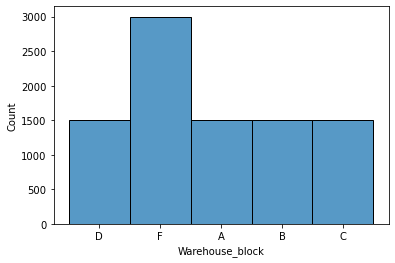

In [3]:
sns.histplot(data['Warehouse_block'])

### Medio de transporte

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Count'>

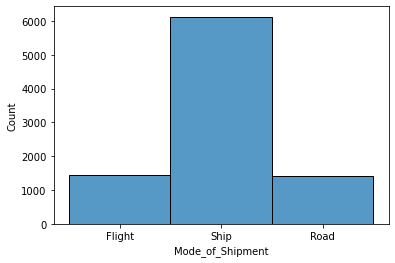

In [4]:
sns.histplot(data['Mode_of_Shipment'])

### Importancia del producto

<AxesSubplot:xlabel='Product_importance', ylabel='Count'>

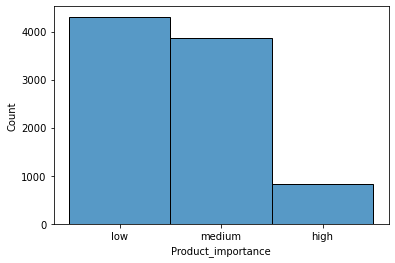

In [5]:
sns.histplot(data['Product_importance'])

### Genero

<AxesSubplot:xlabel='Gender', ylabel='Count'>

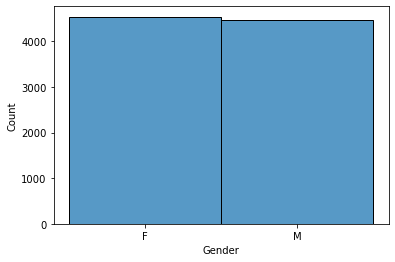

In [6]:
sns.histplot(data['Gender'])

Los datos observados anteriormente se pueden manejar con algunas tecnicas como lo son OrdinalEncoder,OneHotEncoder,etc.

## Separando datos categoricos y numericos en listas

In [7]:
categoricos = [cat for cat in data.columns if data[cat].dtype == "object" and data[cat].nunique() <= 10]

In [8]:
categoricos

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [9]:
numericos = [num for num in data.columns if data[num].dtype != "object"]

El ID no ayudara en el modelo

In [10]:
numericos.remove('ID')

In [11]:
numericos

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

Ordenamos las columnas

In [12]:
data = data[numericos + categoricos]

In [13]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,4,2,177,3,44,1233,1,D,Flight,low,F
1,4,5,216,2,59,3088,1,F,Flight,low,M
2,2,2,183,4,48,3374,1,A,Flight,low,M
3,3,3,176,4,10,1177,1,B,Flight,medium,M
4,2,2,184,3,46,2484,1,C,Flight,medium,F


### Separando en caracteristicas y variable objetivos

Como valores de X no consideramos **Reached.on.Time_Y.N** ya que es la variable objetivo y tambien descartamos **Gender** ya que no nos dara mejora en el modelo

In [14]:
X = data.loc[:,[dx for dx in data.columns if dx not in ['Reached.on.Time_Y.N','Gender']]]
y = data['Reached.on.Time_Y.N']

In [15]:
X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance
0,4,2,177,3,44,1233,D,Flight,low
1,4,5,216,2,59,3088,F,Flight,low
2,2,2,183,4,48,3374,A,Flight,low
3,3,3,176,4,10,1177,B,Flight,medium
4,2,2,184,3,46,2484,C,Flight,medium
...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,D,Ship,low
8995,5,3,232,3,3,4526,F,Ship,medium
8996,4,5,260,3,6,4221,A,Ship,medium
8997,4,2,184,3,5,5931,B,Ship,medium


### Separando valores en train test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1)

# Pipelin y ColumnsTransform

Usamos **tuberias** para que se nos haga mas facil llegar a los resultados

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


Existen diversas formas de manejar los datos categorios, en mi caso usare **OrdinalEncoder** y **OneHotEncoder** y asi evaluar los resultados

### OrdinalEncoder

Primero transformo las columnas

In [19]:
encoder = OrdinalEncoder()
standard = StandardScaler()

In [20]:
encoder_standard = ColumnTransformer(transformers=[
    ("encoder",encoder,categoricos[:3]),
    ("standar",standard,[num for num in numericos if num not in ['Reached.on.Time_Y.N']])
])

### OneHotEncoder

Primero transformo las columnas

In [21]:
encoder2 = OneHotEncoder()
standard2 = StandardScaler()

In [22]:
encoder_standard2 = ColumnTransformer(transformers=[
    ("encoder",encoder2,categoricos[:3]),
    ("standar",standard2,[num for num in numericos if num not in ['Reached.on.Time_Y.N']])
])

-----------------------------------------------------------------------------------------------------------------

# <-----------------------------------Modelos--------------------------------->

# 1.LogisticRegression

## OrdinalEncoder

Ahora si usamos las **tuberias**

In [23]:
modelLogistic = LogisticRegression() 

Agrego los pasos dentro de mi tuberia

In [24]:
pipeline_linearR = Pipeline(steps=[
    ("columnsTransforms",encoder_standard),
    ("modeloLineal",modelLogistic)
])

Ajustamos el modelo

In [25]:
pipeline_linearR.fit(train_x,train_y)

Pipeline(steps=[('columnsTransforms',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('modeloLineal', LogisticRegression())])

Predecimos

In [26]:
prediction = pipeline_linearR.predict(test_x)

Evaluamos el modelo

In [27]:
from sklearn.metrics import confusion_matrix,recall_score
matrix = confusion_matrix(test_y,prediction)
print(matrix)
print(recall_score(test_y,prediction))

[[ 545  468]
 [ 405 1282]]
0.7599288678126852


#### Recall : 0.7599288678126852

----------------------------------------------------------------------

## OneHotEncoder

Usamos las **tuberias** para el caso de **OneHotEncoder**

In [28]:
pipeline_linear_oh = Pipeline(steps=[
    ("columnsTransforms",encoder_standard2),
    ("modeloLineal",modelLogistic)
])

Ajustamos

In [29]:
pipeline_linear_oh.fit(train_x,train_y)

Pipeline(steps=[('columnsTransforms',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('modeloLineal', LogisticRegression())])

Predecimos

In [30]:
prediction_l_oh = pipeline_linear_oh.predict(test_x)

Evaluamos el modelo

In [31]:
matrix_l_oh = confusion_matrix(test_y,prediction_l_oh)
print(matrix_l_oh)
print(recall_score(test_y,prediction_l_oh))

[[ 543  470]
 [ 407 1280]]
0.7587433313574392


#### Recall: 0.7587433313574392

#### Vemos que un mejor resultado nos trajo usar **OrdinalEncoder** para el caso de **RegresionLogistca**

------------------------------------------------------------------------

# 2.DecisionTreeClassifier

## OrdinalEncoder

Evaluamos para **OrdinalEncoder**

In [32]:
from sklearn.tree import DecisionTreeClassifier

#### Evaluamos diversas profundidades con criterio entropy  

In [33]:
recall_tree_oe = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall_tree_oe.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

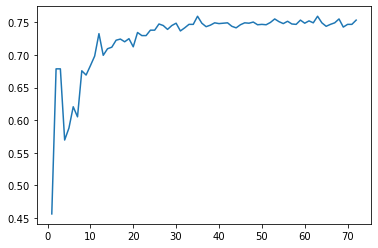

In [34]:
sns.lineplot(x=range(1,73),y=recall_tree_oe)

In [35]:
max(recall_tree_oe)

0.7593360995850622

#### Evaluamos diversas profundidades con criterio gini  

In [36]:
recall = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

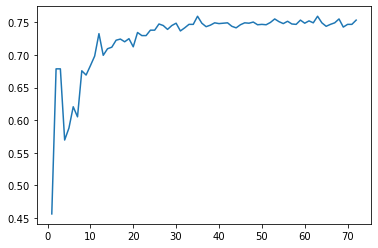

In [37]:
sns.lineplot(x=range(1,73),y=recall_tree_oe)

In [38]:
max(recall)

0.7575577949021932

----------------------------------------------------------

## OneHotEncoder

#### Hacemos lo mismo que el anterior, evaluando diversas profundidades y criterio gini

In [39]:
recall_tree_oh = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall_tree_oh.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

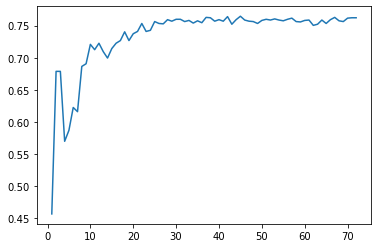

In [40]:
sns.lineplot(x=range(1,73),y=recall_tree_oh)

In [41]:
max(recall_tree_oh)

0.7646710136336692

#### Evaluamos con criterio entropy

In [42]:
recall_tree_oh_gi = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall_tree_oh_gi.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

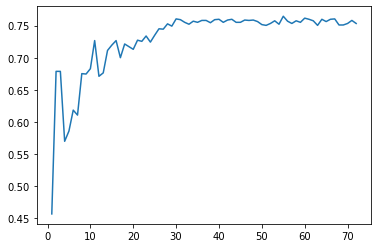

In [43]:
sns.lineplot(x=range(1,73),y=recall_tree_oh_gi)

In [44]:
max(recall_tree_oh_gi)

0.7646710136336692

-------------------------------------------------------------------------------

# 3.RandomForestClassifier

## OrdinalEncoder

Para este caso como tenemos mas parametros por evaluar y combinar seria mejor usas **GridSearchCV**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Definimos Parametros

In [46]:
params_forest = {
    'n_estimators':range(10,30),
    'criterion' : ["gini", "entropy"],
    'max_depth' : range(10,30)
}

Definimos modelos

In [47]:
modeloForest = RandomForestClassifier(random_state=1)
gridForest = GridSearchCV(modeloForest,params_forest,scoring='recall')

Agregamos a la tuberia los procesos a seguri

In [48]:
pipeline_forest = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridForest",gridForest)
    ])

Ajustamos el modelo

In [49]:
pipeline_forest.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridForest',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid={'criterion': [

Predecimos

In [50]:
pred_forest = pipeline_forest.predict(test_x)

Evaluamos el modelo

In [51]:
recall_score(test_y,pred_forest)

0.7243627741553053

## OneHotEncoder

Agregamos el proceso en la tuberia

In [52]:
pipeline_forest2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridForest",gridForest)
    ])

Ajustamos

In [53]:
pipeline_forest2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridForest',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid={'criterion': ['

Predecimos

In [54]:
pred_forest2 = pipeline_forest2.predict(test_x)

Evaluamos

In [55]:
recall_score(test_y,pred_forest2)

0.7148784825133373

#### **Vemos que los resultados son peores que los que nos dio usando regresion logistica**

----------------------------------------------------------------------------------

# 4.KNeighborsClassifier

## Ordinal

In [56]:
from sklearn.neighbors import KNeighborsClassifier

Definimos el modelo

In [57]:
model_knn = KNeighborsClassifier()

Agregamos los parametros que usaremos

In [58]:
param_knn = {
    'n_neighbors' : range(1,15),
    'weights' : ('uniform','distance'),
    'algorithm' : ("auto", "ball_tree", "kd_tree", "brute")
}

Definimos el modelo

In [59]:
gridknn = GridSearchCV(model_knn,param_knn,scoring='recall')

Agregamos los procesos a la tuberia

In [60]:
pipeline_knn = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridknn",gridknn)
    ])

Ajustamos el modelo

In [61]:
pipeline_knn.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ('auto', 'ball_tree'

Predecimos y evaluamos el modelo

In [62]:
pred_knn = pipeline_knn.predict(test_x)
recall_score(test_y,pred_forest)

0.7243627741553053

## OneHotEncoder

Agregamos los pasos a la tuberia

In [63]:
pipeline_knn2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridknn",gridknn)
    ])

Ajustamos el modelo

In [64]:
pipeline_knn2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ('auto', 'ball_tree',

Predecimos y evaluamos el modelo

In [65]:
pred_knn2 = pipeline_knn2.predict(test_x)
recall_score(test_y,pred_knn2)

0.7273266152934202

#### **Vemos que tampoco logra superar al primer modelo**

--------------------------------------------------------------------------------

# 5.SVC

## OrdinalEncoder

In [66]:
from sklearn.svm import SVC

Agregamos los parametros que deseamos evaluar

In [67]:
parametros_svm = {
    'kernel':("linear", "poly", "rbf", "sigmoid"),
    'gamma' : ("scale","auto")
}

Definimos los modelos

In [68]:
modelSVC = SVC(random_state=1)
gridSVC = GridSearchCV(modelSVC,parametros_svm,scoring='recall')

Agregamos los pasos a la tuberia

In [69]:
pipeline_svc = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridknn",gridSVC)
    ])

Ajustamos

In [70]:
pipeline_svc.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=SVC(random_state=1),
                              param_grid={'gamma': ('scale', 'auto'),
        

Predeimos y evaluamos

In [71]:
pred_svc= pipeline_svc.predict(test_x)
recall_score(test_y,pred_svc)

0.7593360995850622

## OneHot

Agregamos a la tuberia los pasos

In [72]:
pipeline_svc2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridknn",gridSVC)
    ])

Ajustamos

In [73]:
pipeline_svc2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=SVC(random_state=1),
                              param_grid={'gamma': ('scale', 'auto'),
         

Predecimos y evaluamos

In [74]:
pred_svc2= pipeline_svc2.predict(test_x)
recall_score(test_y,pred_svc2)

0.7996443390634262

#### **El modelo logro mejorar usando OneHot Encoder, superando asi al primer modelo.....Mejor recall en total: 0.799644339063426**

--------------------------------------------------------------------

# <----------------Predecimos para E-Commerce-test-------------------->

# Ecomerce

Leemos la data 

In [75]:
ecomerce = pd.read_excel('../Data/E-Commerce_test.xlsx')

In [76]:
ecomerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


Sacamos los valores categoricos y numericos

In [77]:
categoricos_e = [cat for cat in ecomerce.columns if ecomerce[cat].dtype == "object" and ecomerce[cat].nunique() <= 10]
numericos_e = [num for num in ecomerce.columns if ecomerce[num].dtype != "object"]

In [78]:
categoricos_e

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

removemos el ID por que servira para el modelo

In [79]:
numericos_e.remove('ID')

In [80]:
numericos_e

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

Ordenamos las columnas

In [81]:
ecommerce_test = ecomerce[numericos_e+categoricos_e]

In [82]:
ecommerce_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,5,1,189,2,10,5248,F,Ship,medium,M
1,5,3,150,2,9,4446,D,Ship,high,F
2,3,3,200,3,3,5739,F,Ship,low,M
3,5,1,133,2,1,4643,A,Ship,medium,M
4,4,2,260,3,4,5504,B,Ship,low,M


**Como ya tenemos las tuberias listas solo es necesario colocar la data. Las tuberias automaticamente manejaran los datos categoricos y estandarizar los datos**

**Recordemos que el mejor modelo fue SVC-OneHotEnoder**

In [83]:
pred_final= pipeline_svc2.predict(ecommerce_test)

Creamos el DataFrame

In [84]:
df = pd.DataFrame({'pred':pred_final})

Creamos el Archivo CSV

In [85]:
df.to_csv("../Edward-Htc.csv",index=False)

### Visualizando resultados

In [1]:
recall = [0.7599288678126852,0.7587433313574392,0.7593360995850622,0.7575577949021932,0.7646710136336692,0.7646710136336692,0.7243627741553053,0.7148784825133373,0.7243627741553053,0.7273266152934202,0.7593360995850622,0.7996443390634262]
model = ["Lr_OE","Lr_OHE","DTC_OE_E","DTC_OE_G","DTC_OHE_G","DTC_OHE_E","RFC_OE","RFC_OHE","KNC_OE","KNC_OHE","SVC_OE","SVC_OHE"]

In [5]:
score = pd.DataFrame({"Modelo":model,"Recall_score":recall})

In [10]:
score

,Modelo,Recall_score
0,Lr_OE,0.759929
1,Lr_OHE,0.758743
2,DTC_OE_E,0.759336
3,DTC_OE_G,0.757558
4,DTC_OHE_G,0.764671
5,DTC_OHE_E,0.764671
6,RFC_OE,0.724363
7,RFC_OHE,0.714878
8,KNC_OE,0.724363
9,KNC_OHE,0.727327


Text(12, 0.9, 'Mejor recall')

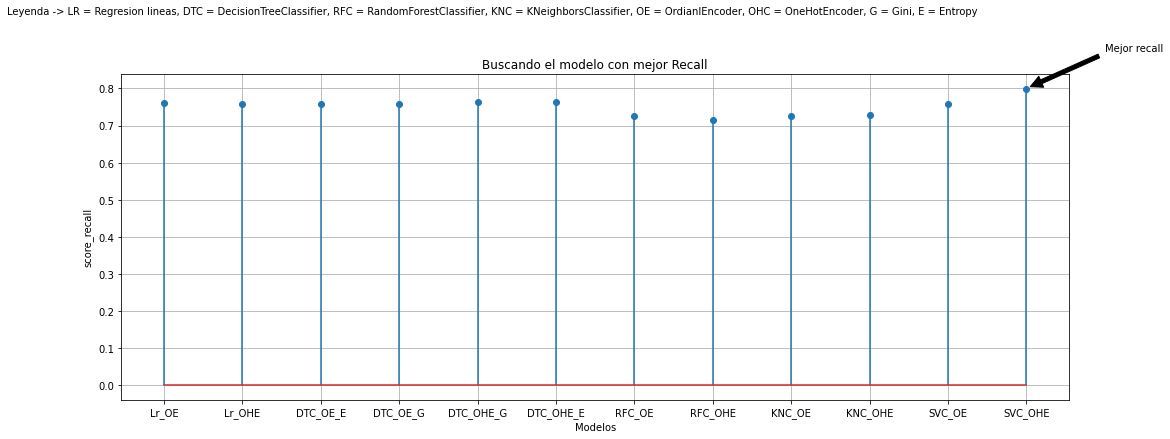

In [56]:
fig, ax = plt.subplots(figsize=(17,6))
ax.stem(score["Modelo"],score["Recall_score"])
ax.grid()
ax.set_title("Buscando el modelo con mejor Recall")
ax.set_xlabel("Modelos")
ax.set_ylabel("score_recall")
ax.text(x=-2,y=1,s="Leyenda -> LR = Regresion lineas, DTC = DecisionTreeClassifier, RFC = RandomForestClassifier, KNC = KNeighborsClassifier, OE = OrdianlEncoder, OHC = OneHotEncoder, G = Gini, E = Entropy")
ax.annotate("Mejor recall",xy = (11,0.8),xytext=(12, 0.9),arrowprops=dict(facecolor='black', shrink=0.05))